# Heart Disease Prediction

A model that will predict whether a patient is likely to develop heart disease. 
For data I am using the processed data from cleveland that has been deemed to have a quality data set from the UCI Machine Learning Repository

### Imports

In [1]:
import pandas as pd                 # this is a dataframe library
import matplotlib.pyplot as plt     # plots data
import numpy as np                  # provides N-dim Object support

# do plotting inline instead of a separate window
%matplotlib inline

## Load and Review Data

In [2]:
df = pd.read_csv("./data/processed.cleveland.data")          # Load data. Configure directory accordingly

### Show head of data

In [3]:
df.head()       #first 5 entries of data

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


Note: There are no column names

### Column Names

1. age 
2. sex - 1=male, 0=female
3. cp - chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = yes; 0 = no)
7. restecg - resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num - diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing
   

In [4]:
## Name columns
df.columns = ['age','sex','cp','trestbps','chol','fbs',
             'restecg','thalac','exang','oldpeak','slope','ca',
             'thal','num']

In [5]:
## Show the head once more
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


Now the data seems to be labeled correctly.

In [6]:
# Check for null values
df.isnull().values.any()

False

In [7]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


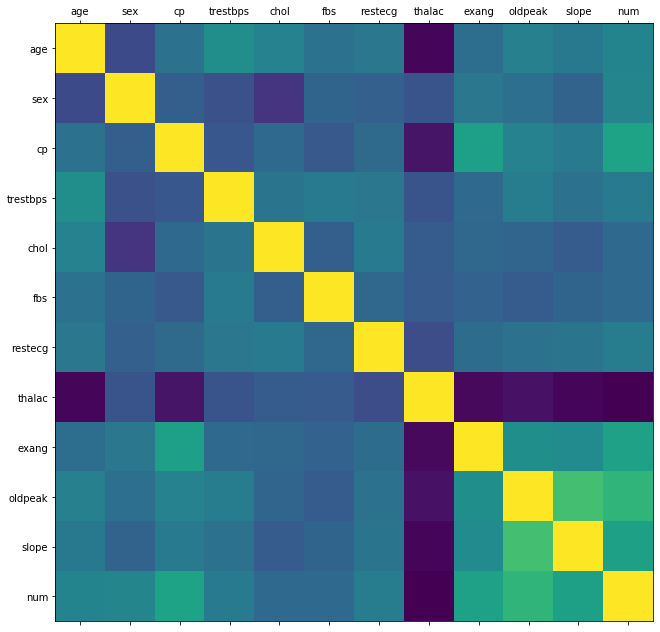

In [8]:
plot_corr(df)

In [9]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,num
age,1.000000,-0.099925,0.112326,0.283257,0.210120,0.112245,0.146142,-0.394448,0.094065,0.201083,0.156199,0.225809
sex,-0.099925,1.000000,0.015342,-0.066292,-0.199492,0.042863,0.019386,-0.048740,0.148019,0.099976,0.032671,0.226601
cp,0.112326,0.015342,1.000000,-0.030717,0.070950,-0.022524,0.075854,-0.337136,0.382394,0.212589,0.171926,0.405182
trestbps,0.283257,-0.066292,-0.030717,1.000000,0.130924,0.171127,0.144395,-0.045437,0.066627,0.186987,0.112752,0.159978
chol,0.210120,-0.199492,0.070950,0.130924,1.000000,0.012058,0.172249,-0.003417,0.060755,0.047617,-0.002085,0.070315
fbs,0.112245,0.042863,-0.022524,0.171127,0.012058,1.000000,0.062202,-0.008067,0.031514,-0.002907,0.042630,0.065937
restecg,0.146142,0.019386,0.075854,0.144395,0.172249,0.062202,1.000000,-0.083591,0.087432,0.110879,0.127603,0.186769
thalac,-0.394448,-0.048740,-0.337136,-0.045437,-0.003417,-0.008067,-0.083591,1.000000,-0.378368,-0.343821,-0.389078,-0.415399
exang,0.094065,0.148019,0.382394,0.066627,0.060755,0.031514,0.087432,-0.378368,1.000000,0.291536,0.265491,0.395996
oldpeak,0.201083,0.099976,0.212589,0.186987,0.047617,-0.002907,0.110879,-0.343821,0.291536,1.000000,0.575415,0.508330


In [10]:
hd_map = {1: 1, 2: 1, 3: 1, 4: 1, 0: 0}

In [11]:
# Changing all values that represent whether a patient has heart disease to just 2 values
# 1 = heart disease is present, 2 = heart disease is not present.
df['num'] = df['num'].map(hd_map)

In [12]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [13]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


### Check the ratio of people with vs without heart disease

In [14]:
num_true = len(df.loc[df['num'] == 1])
num_false = len(df.loc[df['num'] == 0])
num_objs = num_true + num_false

print("Number of patients with heart disease:", num_true, "(" + str(round((num_true / num_objs) * 100, 2)) + "%)")
print("Number of patients without heart disease:", num_false, "(" + str(round((num_false / num_objs) * 100, 2)) + "%)")


Number of patients with heart disease: 139 (46.03%)
Number of patients without heart disease: 163 (53.97%)


This proves to be a good distribution for the diagnosis of heart disease

### Split the data

70% training data, 30% testing data

In [15]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

feature_col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalac', 'exang', 'oldpeak','slope','ca',
                    'thal']
predicted_class_names = ['num']

X = df[feature_col_names].values     # predictor feature columns (13 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)

split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 
                            # test_size = 0.3 is 30%, 42 is the answer to everything

Now to ensure the data was split correctly

In [16]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

69.87% in training set
30.13% in test set


### Verifying the correct split 

In [17]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['num'] == 1]), (len(df.loc[df['num'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['num'] == 0]), (len(df.loc[df['num'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 139 (46.03%)
Original False : 163 (53.97%)

Training True  : 96 (45.50%)
Training False : 115 (54.50%)

Test True      : 43 (47.25%)
Test False     : 48 (52.75%)


Here we see that the ratio between pos/neg diagnoses are about the same for the original data, the training data and
the testing data

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalac,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
